In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
import os
import random

from google. colab import drive
drive.mount ('/content/drive')

!unzip /content/drive/MyDrive/Pneumonia_27k.zip

Streaming output truncated to the last 5000 lines.
  inflating: Pneumonia_27k/valid/NORMAL/IM-0499-0001-0002_jpeg_jpg.rf.84f0510d7a4766c8c028c9b4cf16d927.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0499-0001-0002_jpeg_jpg.rf.e910e0b0d95837a307008aec928d1036.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0500-0001_jpeg_jpg.rf.9a06edd4c246bc09501fae2d165ffeea.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0500-0001_jpeg_jpg.rf.a9c5df476567668352523637e5aa160c.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0500-0001_jpeg_jpg.rf.e97daddaa39a5d545e99b8b8c84f0bae.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0501-0001-0001_jpeg_jpg.rf.000c46a17864c55b61d746ac6fd229f3.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0501-0001-0001_jpeg_jpg.rf.2744ec21066e4b095e7485d3fb0df0ba.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0501-0001-0002_jpeg_jpg.rf.228afcc8400ed2e09700a784bc03e528.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0501-0001-0002_jpeg_jpg.rf.9e08b2d19992220edd2527

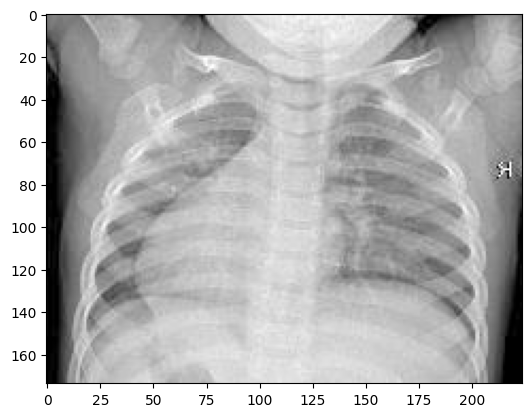

Found 19032 files belonging to 3 classes.
Found 5412 files belonging to 3 classes.
Found 2712 files belonging to 3 classes.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
import os
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data_train = "/content/Pneumonia_27k/train"
data_test = "/content/Pneumonia_27k/test"
data_val = "/content/Pneumonia_27k/valid"

train_dir = os.path.join (data_train)
test_dir = os.path.join (data_test)
val_dir = os.path.join (data_val)

CATEGORIES =["NORMAL", "PNEUMONIA (BAKTERI)", "PNEUMONIA (VIRUS)" ]
for category in CATEGORIES:
  path = os.path. join (data_train, category)
  for img in os.listdir(path):
    img_array = plt. imread (os.path. join (path, img) )
    plt.imshow (img_array)
    plt. show ()
    break
  break
train_data = tf.keras.utils.image_dataset_from_directory (train_dir,
                                                            image_size = (224, 224),
                                                            class_names = CATEGORIES,
                                                            seed = 5,
                                                            label_mode = 'categorical',
                                                          )
validation_data = tf.keras.utils.image_dataset_from_directory (val_dir,
                                                               image_size = (224, 224),
                                                               class_names = CATEGORIES,
                                                               seed = 5,
                                                               label_mode = 'categorical',
                                                               )
test_data = tf.keras.utils.image_dataset_from_directory (test_dir,
                                                          image_size = (224,224),
                                                          class_names = CATEGORIES,
                                                          seed = 5,
                                                          label_mode = 'categorical',
                                                         )


In [3]:
#Model CNN
def build_model(conv_layer_number, filter_number, filter_size, batch_size):
  conv_layer_number = abs(int(conv_layer_number))
  filter_number = abs(int(filter_number))
  filter_size = abs(int(filter_size))
  batch_size = abs(int(batch_size))
  if conv_layer_number == 1:
    print("\n1 Convolutional Layer")
    model = keras.Sequential([
        keras.layers.Conv2D(filters=filter_number,kernel_size=(filter_size,filter_size),strides = 1 , padding = 'same' ,
                            activation = 'relu' , input_shape = (224,224,1)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D ((2,2)),
        keras.layers.Flatten (),
        keras.layers.Dense (units=(512), activation='relu'),
        keras.layers.Dropout (0.2),
        keras.layers.Dense (units=(256), activation='relu'),
        keras.layers.Dropout (0.2),
        keras.layers.Dense (units=(128), activation='relu'),
        keras.layers.Dropout (0.2),
        keras.layers.Dense(3, activation='softmax')])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss ='categorical_crossentropy',metrics = ['accuracy'])
    history = model.fit(train_data,epochs = 10,validation_data=validation_data,batch_size = batch_size)
    model_loss, model_acc = model.evaluate(test_data)
    print("Model Accuracy = ", model_acc*100)
    return model_acc*100

  else:
    if conv_layer_number == 2:
      print("\n2 Convolutional Layer")
      model = keras.Sequential ([
          keras.layers.Conv2D(filters=filter_number,kernel_size=(filter_size,filter_size),strides = 1 , padding = 'same' ,
                              activation = 'relu' , input_shape = (224,224,1)),
          keras.layers.BatchNormalization(),
          keras.layers.MaxPooling2D ((2,2)),
          keras.layers.Conv2D(filters=filter_number,kernel_size=(filter_size,filter_size),strides = 1 , padding = 'same' ,
                              activation = 'relu'),
          keras.layers.BatchNormalization(),
          keras.layers.MaxPooling2D ((2,2)),
          keras.layers.Flatten (),
          keras.layers.Dense (units=(512), activation='relu'),
          keras.layers.Dropout (0.2),
          keras.layers.Dense (units=(256), activation='relu'),
          keras.layers.Dropout (0.2),
          keras.layers.Dense (units=(128), activation='relu'),
          keras.layers.Dropout (0.2),
          keras.layers.Dense(3, activation='softmax')])
      model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
      history=model.fit (train_data,epochs=10,validation_data=validation_data,batch_size=batch_size)
      model_loss, model_acc = model.evaluate(test_data)
      print ("Model Accuracy : ", model_acc*100)

      return model_acc*100

    else:
      if conv_layer_number == 3:
        print("\n3 Convolutional Layer")
        model = keras.Sequential([
            keras.layers.Conv2D(filters=filter_number,kernel_size=(filter_size,filter_size),strides = 1 , padding = 'same' ,
                            activation = 'relu' , input_shape = (224,224,1)),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D ((2,2)),
            keras.layers.Conv2D(filters=filter_number,kernel_size=(filter_size,filter_size),strides = 1 , padding = 'same' ,
                                activation = 'relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D ((2,2)),
            keras.layers.Conv2D(filters=filter_number,kernel_size=(filter_size,filter_size),strides = 1 , padding = 'same' ,
                                activation = 'relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D ((2,2)),
            keras.layers.Flatten (),
            keras.layers.Dense (units=(512), activation='relu'),
            keras.layers.Dropout (0.2),
            keras.layers.Dense (units=(256), activation='relu'),
            keras.layers.Dropout (0.2),
            keras.layers.Dense (units=(128), activation='relu'),
            keras.layers.Dropout (0.2),
            keras.layers.Dense(3, activation='softmax')])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
        history=model.fit(train_data,epochs=10, validation_data=validation_data,batch_size=batch_size)
        model_loss, model_acc = model.evaluate(test_data)
        print("Model Accuray : ", model_acc*100)

        return model_acc*100


In [4]:
import numpy as np
import random

def generate_position(n_dim, l_sol, u_sol):
    position = np.zeros(n_dim, dtype=np.int64)
    for i in range(n_dim):
        while position[i] == 0:  # Keep generating until not zero
            position[i] = random.randint(l_sol[i], u_sol[i])
    return position

def abc_opt(maximum=True, iteration=2, limit=1):
    n_dim = 4
    n_particles = 3
    l_sol = [1, 8, 1, 8]
    u_sol = [3, 128, 4, 128]

    def convert(particles_position):
        if particles_position == 1:
            return 3
        elif particles_position == 2:
            return 5
        elif particles_position == 3:
            return 7
        else:
            return 9

    def evaluate_architecture(position):
        print("\nEvaluating Architecture with Position:", position)
        return build_model(conv_layer_number=position[0], filter_number=position[1], filter_size=position[2],
                           batch_size=position[3])

    particles_pos = np.zeros((n_particles, n_dim), dtype=np.int64)
    for i in range(n_particles):
        for j in range(n_dim):
            particles_pos[i][j] = random.randint(l_sol[j], u_sol[j])
        particles_pos[i][2] = convert(particles_pos[i][2])

    print("Initial Particle Position: ")
    print(particles_pos)

    employed_bees = particles_pos.copy()
    employed_values = [evaluate_architecture(p) for p in employed_bees]
    best_value = max(employed_values)
    global_best = employed_bees[np.argmax(employed_values)]

    trial_counter = np.zeros(n_particles, dtype=np.int64)

    it = 0
    while it < iteration:
        print("\nRunning iteration:", it + 1)
        print("Employed Bee Phase")
        for i in range(n_particles):
            print("\nEmployed Bee", i+1)
            candidate_positions = []
            for _ in range(limit):
                # Generate candidate positions
                new_position = np.zeros(n_dim, dtype=np.int64)
                for j in range(n_dim):
                    rand_value = random.uniform(0, 1)
                    new_position[j] = employed_bees[i][j] + rand_value * (employed_bees[i][j] - global_best[j])

                    # Bound the position within the specified limits
                    new_position[j] = max(new_position[j], l_sol[j])
                    new_position[j] = min(new_position[j], u_sol[j])

                new_position[2] = convert(new_position[2])
                # Add candidate position
                candidate_positions.append(new_position)

            candidate_values = [evaluate_architecture(pos) for pos in candidate_positions]

            if maximum:
                if max(candidate_values) > employed_values[i]:
                    employed_bees[i] = candidate_positions[np.argmax(candidate_values)]
                    employed_values[i] = max(candidate_values)
                    trial_counter[i] = 0
                    print("\nNew Position for Employed Bee", i + 1, ":", employed_bees[i])
                    print("Accuracy for Employed Bee", i + 1, ":", employed_values[i])
                else:
                    trial_counter[i] += 1
                    print("\nNew Position Rejected for Employed Bee", i + 1)
            print("Trial Counter Bee", i + 1, ":", trial_counter[i])

        print("\nOnlooker Bee Phase")
        onlooker_bees = []
        onlooker_values = []
        probabilities = [value / sum(employed_values) for value in employed_values]
        for i in range(n_particles):
            print("\nOnlooker Bee", i+1)
            selected_bee = np.random.choice(range(n_particles), p=probabilities)
            onlooker_bees.append(employed_bees[selected_bee])
            onlooker_values.append(employed_values[selected_bee])
            print("Probability for Onlooker Bee", i + 1, ":", probabilities[selected_bee])
            print("Particle Position for Onlooker Bee", i + 1, ":", onlooker_bees[-1])
            print("Accuracy for Onlooker Bee", i + 1, ":", onlooker_values[-1])

            # Generate a new solution with a probability check
            rand_value = random.random()
            print("Random number:", rand_value)
            if rand_value < probabilities[selected_bee]:
                new_position = np.zeros(n_dim, dtype=np.int64)
                for j in range(n_dim):
                    new_position[j] = random.randint(l_sol[j], u_sol[j])
                new_position[2] = convert(new_position[2])
                new_value = evaluate_architecture(new_position)
                print("Generated New Solution for Onlooker Bee", i + 1, ":", new_position)
                print("Accuracy for Onlooker Bee", i + 1, ":", new_value)

                if new_value > onlooker_values[i]:
                    onlooker_bees[-1] = new_position
                    onlooker_values[i] = new_value
                    trial_counter[i] = 0
                    print("New Solution Accepted for Onlooker Bee", i + 1)
                else:
                    trial_counter[i] += 1
                    print("New Solution Rejected for Onlooker Bee", i + 1)
            print("Trial Counter Bee", i + 1, ":", trial_counter[i])

        for i in range(n_particles):
            if trial_counter[i] > limit:
                print("Scout Phase Applied for Employee and Onlooker Bee", i + 1)
                new_position = np.zeros(n_dim, dtype=np.int64)
                for j in range(n_dim):
                    new_position[j] = random.randint(l_sol[j], u_sol[j])
                new_position[2] = convert(new_position[2])
                employed_bees[i] = new_position #ini kaya buat update aja 
                onlooker_bees[i] = new_position
                #print("Particle Position for Employee Bee", i + 1, ":", employed_bees[i])
                #print("Particle Position for Onlooker Bee", i + 1, ":", onlooker_bees[i])
                employed_values[i] = evaluate_architecture(new_position)
                onlooker_values[i] = evaluate_architecture(new_position)
                trial_counter[i] = 0
                

        employed_bees = onlooker_bees
        employed_values = onlooker_values
        it += 1

        if max(employed_values) > best_value:
            best_value = max(employed_values)
            global_best = employed_bees[np.argmax(employed_values)]

    print("Global Best (Arsitektur Terbaik):", global_best)
    print("Best Value (Akurasi Terbaik):", best_value)

    return global_best, best_value

abc_opt()

Initial Particle Position: 
[[ 3 17  5 22]
 [ 3 16  5 50]
 [ 3  9  9 76]]

Evaluating Architecture with Position: [ 3 17  5 22]

3 Convolutional Layer
Epoch 1/10
595/595 [==============================] - 41s 43ms/step - loss: 0.6327 - accuracy: 0.7402 - val_loss: 0.4763 - val_accuracy: 0.7964
Epoch 2/10
595/595 [==============================] - 25s 42ms/step - loss: 0.3969 - accuracy: 0.8222 - val_loss: 0.3758 - val_accuracy: 0.8335
Epoch 3/10
595/595 [==============================] - 25s 41ms/step - loss: 0.3089 - accuracy: 0.8660 - val_loss: 0.3748 - val_accuracy: 0.8328
Epoch 4/10
595/595 [==============================] - 23s 38ms/step - loss: 0.2114 - accuracy: 0.9152 - val_loss: 0.3389 - val_accuracy: 0.8901
Epoch 5/10
595/595 [==============================] - 24s 41ms/step - loss: 0.1326 - accuracy: 0.9519 - val_loss: 0.1197 - val_accuracy: 0.9549
Epoch 6/10
595/595 [==============================] - 27s 45ms/step - loss: 0.0787 - accuracy: 0.9716 - val_loss: 0.1412 - val_ac

In [10]:
best_model = keras.Sequential([
        keras.layers.Conv2D(filters=8,kernel_size=(9,9),strides = 1 , padding = 'same' ,
                            activation = 'relu' , input_shape = (224,224,3)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D ((2,2)),
        keras.layers.Conv2D(filters=8,kernel_size=(9,9),strides = 1 , padding = 'same' ,
                                activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D ((2,2)),
        keras.layers.Conv2D(filters=8,kernel_size=(9,9),strides = 1 , padding = 'same' ,
                                activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D ((2,2)),
        keras.layers.Flatten (),
        keras.layers.Dense (units=(512), activation='relu'),
        keras.layers.Dropout (0.2),
        keras.layers.Dense (units=(256), activation='relu'),
        keras.layers.Dropout (0.2),
        keras.layers.Dense (units=(128), activation='relu'),
        keras.layers.Dropout (0.2),
        keras.layers.Dense(3, activation='softmax')])
best_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history=best_model.fit(train_data,epochs=10, validation_data=validation_data,batch_size=79)
best_model_loss, best_model_acc = best_model.evaluate(test_data)
print("Model Accuray : ", best_model_acc*100)

Epoch 1/10
595/595 [==============================] - 32s 48ms/step - loss: 0.6103 - accuracy: 0.7299 - val_loss: 0.4897 - val_accuracy: 0.7849
Epoch 2/10
595/595 [==============================] - 28s 47ms/step - loss: 0.3962 - accuracy: 0.8241 - val_loss: 0.3620 - val_accuracy: 0.8407
Epoch 3/10
595/595 [==============================] - 28s 47ms/step - loss: 0.3142 - accuracy: 0.8704 - val_loss: 0.4262 - val_accuracy: 0.8173
Epoch 4/10
595/595 [==============================] - 29s 48ms/step - loss: 0.2114 - accuracy: 0.9183 - val_loss: 0.1546 - val_accuracy: 0.9448
Epoch 5/10
595/595 [==============================] - 29s 48ms/step - loss: 0.1320 - accuracy: 0.9506 - val_loss: 0.1576 - val_accuracy: 0.9479
Epoch 6/10
595/595 [==============================] - 28s 47ms/step - loss: 0.0831 - accuracy: 0.9715 - val_loss: 0.1373 - val_accuracy: 0.9516
Epoch 7/10
595/595 [==============================] - 29s 48ms/step - loss: 0.0515 - accuracy: 0.9825 - val_loss: 0.1198 - val_accuracy:

1/1 [==============================] - 0s 119ms/step


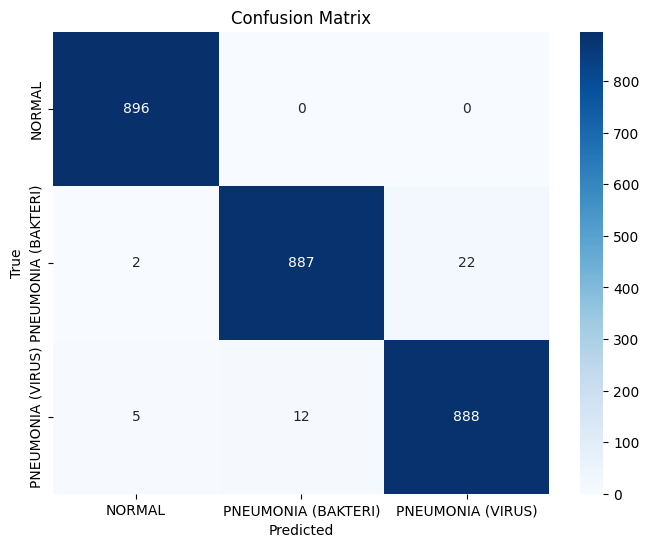

                     precision    recall  f1-score   support

             NORMAL       0.99      1.00      1.00       896
PNEUMONIA (BAKTERI)       0.99      0.97      0.98       911
  PNEUMONIA (VIRUS)       0.98      0.98      0.98       905

           accuracy                           0.98      2712
          macro avg       0.98      0.98      0.98      2712
       weighted avg       0.98      0.98      0.98      2712



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Convert categorical labels into numpy arrays
true_labels = []
predicted_labels = []

for images, labels in test_data:
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(best_model.predict(images), axis=1))

# Compute the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=CATEGORIES))

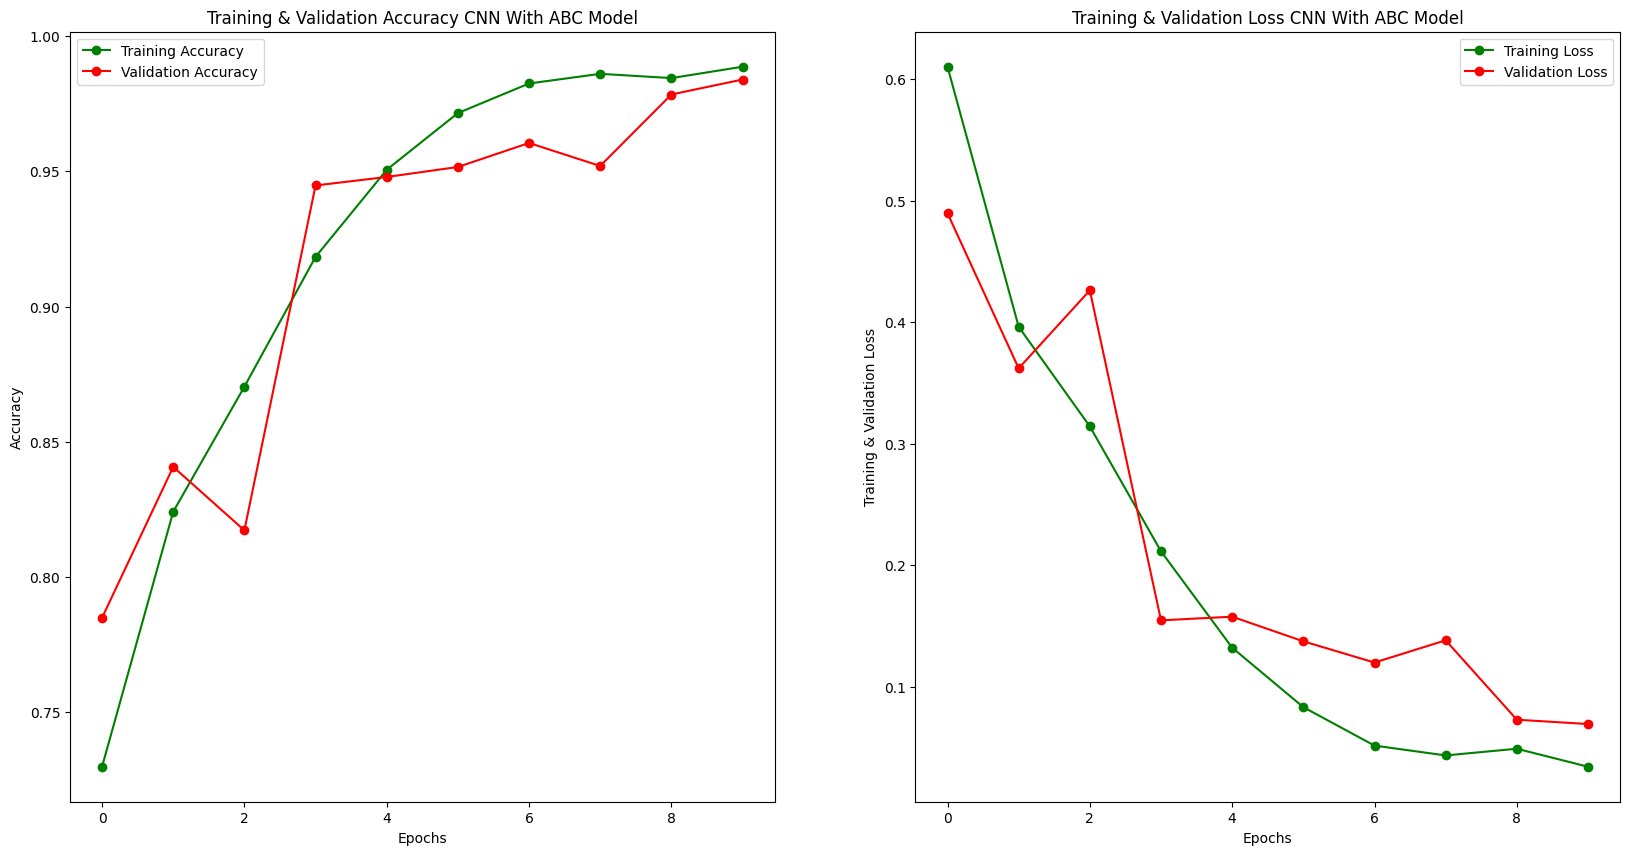

In [12]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy CNN With ABC Model')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss CNN With ABC Model')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()